        Area  Labour_hours  Rainfall        Yield
0     292000         419.7       649  3010.273973
1     305000         419.7       649  2878.688525
2     319000         419.7       649  3106.583072
3     319000         419.7       649  3047.021944
4     319000         419.7       649  3003.134796
...      ...           ...       ...          ...
3023    6175         859.5       494   927.125506
3024    5759         859.5       494   739.017190
3025    3689         859.5       494   545.676335
3026    4253         859.5       494   609.922408
3027    4881         859.5       494  1079.491907

[3028 rows x 4 columns]


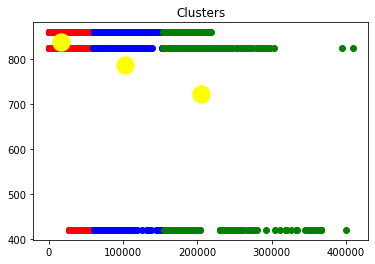

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Importing the dataset
dataset = pd.read_csv('rice2.csv')

#printing dataset

dataset=dataset.drop(['Production'],axis=1)

dataset=dataset.drop(['DAP'],axis=1)
dataset=dataset.drop(['MAP'],axis=1)
dataset=dataset.drop(['MOP'],axis=1)
dataset=dataset.drop(['NPK'],axis=1)
dataset=dataset.drop(['UREA'],axis=1)
dataset=dataset.drop(['TSP'],axis=1)


print(dataset)
#X = StandardScaler().fit_transform(dataset)
X=dataset.values


#print(X)

# Applying k-means to the sample dataset
#k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. 
#Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
#Determines random number generation for centroid initialization.
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0) 
#Compute cluster centers and predict cluster index for each sample.
y_kmeans = kmeans.fit_predict(X)
dataset['Cluster'] = pd.Series(y_kmeans, index=dataset.index)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1],c='red',label='A')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],c='blue',label='B')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1],c='green',label='C')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3,1],c='pink',label='D')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters')

plt.show()

In [56]:
dataset
d0=dataset[dataset['Cluster']==0]
d1=dataset[dataset['Cluster']==1]
d2=dataset[dataset['Cluster']==2]

In [57]:
import pandas as pd
dataset = pd.read_csv('rice2.csv')
print(d0.max()) 
print(d0.min())

print(d1.max()) 
print(d1.min())

print(d2.max()) 
print(d2.min())


Area            60057.0
Labour_hours      859.5
Rainfall         1094.0
Yield           10500.0
Cluster             0.0
dtype: float64
Area              1.0
Labour_hours    419.7
Rainfall        494.0
Yield             0.0
Cluster           0.0
dtype: float64
Area            154085.000000
Labour_hours       859.500000
Rainfall          1094.000000
Yield             4769.230769
Cluster              1.000000
dtype: float64
Area            60412.000000
Labour_hours      419.700000
Rainfall          494.000000
Yield             321.803367
Cluster             1.000000
dtype: float64
Area            409286.000000
Labour_hours       859.500000
Rainfall          1094.000000
Yield             5256.996994
Cluster              2.000000
dtype: float64
Area            154385.000000
Labour_hours       419.700000
Rainfall           494.000000
Yield              813.044427
Cluster              2.000000
dtype: float64


In [21]:
centroids = kmeans.cluster_centers_
print(centroids)

[[1.55863751e+04 3.30207799e+04 6.21878558e-01 5.79620493e-01
  1.00000000e+00 3.28285895e-01 9.76913346e-01 1.00000000e+00
  8.49507970e+02 5.87676787e+02 2.06664353e+03]
 [1.58617070e+05 4.44929984e+05 4.89039813e-01 7.23185012e-01
  1.00000000e+00 4.28079625e-01 9.72482436e-01 1.00000000e+00
  7.23765808e+02 6.72351288e+02 2.94683863e+03]
 [2.45823707e+05 9.35019983e+05 5.67068966e-01 8.13793103e-01
  1.00000000e+00 7.11379310e-01 1.00000000e+00 1.00000000e+00
  6.08094828e+02 8.56155172e+02 3.86826734e+03]
 [9.70895095e+04 2.23825543e+05 4.87186761e-01 6.47754137e-01
  1.00000000e+00 3.18321513e-01 9.68380615e-01 1.00000000e+00
  8.02720922e+02 6.01111111e+02 2.44945115e+03]]


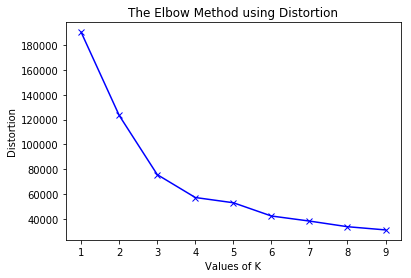

In [10]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt 

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 
    
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [80]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
dataset = pd.read_csv("rice2.csv")
dataset = dataset.drop("Production", axis=1)
#dataset

In [81]:
Y=dataset[['Yield']].copy()
X=dataset.drop("Yield", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


In [85]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 430.4613173601219
Mean Squared Error: 335814.3320195309
Root Mean Squared Error: 579.494893868385


In [83]:
y_test.shape
y_test=y_test.flatten()
y_test.shape

y_pred.shape
y_pred=y_pred.flatten()
y_pred.shape

(606,)

In [84]:
import numpy as np

df= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}, index=[0])
df

ValueError: Shape of passed values is (2, 606), indices imply (2, 1)

In [89]:
import pandas as pd
dataset = pd.read_csv('rice2.csv')
print(dataset.max()) 
print(dataset.min())
print(dataset.mean())

Area             409286.0
Production      1710000.0
UREA                  1.0
DAP                   1.0
MAP                   1.0
MOP                   1.0
NPK                   1.0
TSP                   1.0
Labour_hours        859.5
Rainfall           1094.0
Yield             10500.0
dtype: float64
Area              1.00
Production        0.00
UREA              0.19
DAP               0.49
MAP               1.00
MOP               0.17
NPK               0.75
TSP               1.00
Labour_hours    419.70
Rainfall        494.00
Yield             0.00
dtype: float64
Area             71757.793263
Production      196248.626816
UREA                 0.562365
DAP                  0.632358
MAP                  1.000000
MOP                  0.361589
NPK                  0.975231
TSP                  1.000000
Labour_hours       804.831737
Rainfall           618.798547
Yield             2401.247589
dtype: float64


In [107]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
%matplotlib inline
dataset = pd.read_csv("rice2.csv")
dataset = dataset.drop("Production", axis=1)
#dataset

In [126]:
Y=dataset[['Yield']].copy()
X=dataset.drop("Yield", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
from sklearn.neural_network import MLPClassifier

mlp = MLPRegressor(hidden_layer_sizes=(9), activation='relu', solver='adam', max_iter=1000)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, predict_test))
print(rms)

C:\Users\len0vo500\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


792.9082180881657


In [79]:
import pandas as pd
import numpy as np
 
dataset = pd.read_csv('rice2.csv')


dataset=dataset.drop(['Production'],axis=1)

dataset['fertilizer'] = (dataset['DAP'] +dataset['MAP'] +dataset['MOP'] +dataset['NPK'] +dataset['UREA'] +dataset['TSP'] )/6

dataset=dataset.drop(['DAP'],axis=1)
dataset=dataset.drop(['MAP'],axis=1)
dataset=dataset.drop(['MOP'],axis=1)
dataset=dataset.drop(['NPK'],axis=1)
dataset=dataset.drop(['UREA'],axis=1)
dataset=dataset.drop(['TSP'],axis=1)
 
#dataset['Area'] = np.where(dataset.Area > 1000, 1, 0) # Classify price above 1000 or less
    
#set up bins
bin_area = [-1,59963,153521,410000]
bin_labour = [-1,600,850,1000]
bin_rainfall = [-1,500,700,1200]
bin_yield= [-1,2000,3000,11000]
bin_fertilizer=[0,0.7,0.9,1]
# bin_MAP=[0,0.3,0.6,1]
# bin_MOP=[0,0.3,0.6,1]
# bin_NPK=[0,0.3,0.6,1]
# bin_UREA=[0,0.3,0.6,1]
# bin_TSP=[0,0.3,0.6,1]

#use pd.cut function can attribute the values into its specific bins
category = pd.cut(dataset.Area,bin_area)
category = category.to_frame()
category.columns = ['range_area']
#concatenate age and its bin
df_new = pd.concat([dataset,category],axis = 1)
df_new
category = pd.cut(dataset.Labour_hours,bin_labour)
category = category.to_frame()
category.columns = ['range_labour']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new
category = pd.cut(dataset.Rainfall,bin_rainfall)
category = category.to_frame()
category.columns = ['range_rainfall']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new

category = pd.cut(dataset.Yield,bin_yield)
category = category.to_frame()
category.columns = ['range_yield']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new

category = pd.cut(dataset.fertilizer,bin_fertilizer)
category = category.to_frame()
category.columns = ['range_fertilizer']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new

# category = pd.cut(dataset.MAP,bin_MAP)
# category = category.to_frame()
# category.columns = ['range_map']
# #concatenate age and its bin
# df_new = pd.concat([df_new,category],axis = 1)
# df_new

# category = pd.cut(dataset.MOP,bin_MOP)
# category = category.to_frame()
# category.columns = ['range_mop']
# #concatenate age and its bin
# df_new = pd.concat([df_new,category],axis = 1)
# df_new

# category = pd.cut(dataset.NPK,bin_NPK)
# category = category.to_frame()
# category.columns = ['range_npk']
# #concatenate age and its bin
# df_new = pd.concat([df_new,category],axis = 1)
# df_new

# category = pd.cut(dataset.UREA,bin_UREA)
# category = category.to_frame()
# category.columns = ['range_urea']
# #concatenate age and its bin
# df_new = pd.concat([df_new,category],axis = 1)
# df_new

# category = pd.cut(dataset.TSP,bin_TSP)
# category = category.to_frame()
# category.columns = ['range_tsp']
# #concatenate age and its bin
# df_new = pd.concat([df_new,category],axis = 1)
# df_new







,Area,Labour_hours,Rainfall,Yield,fertilizer,range_area,range_labour,range_rainfall,range_yield,range_fertilizer
0,292000,419.7,649,3010.273973,0.775,"(153521, 410000]","(-1, 600]","(500, 700]","(3000, 11000]","(0.7, 0.9]"
1,305000,419.7,649,2878.688525,0.775,"(153521, 410000]","(-1, 600]","(500, 700]","(2000, 3000]","(0.7, 0.9]"
2,319000,419.7,649,3106.583072,0.775,"(153521, 410000]","(-1, 600]","(500, 700]","(3000, 11000]","(0.7, 0.9]"
3,319000,419.7,649,3047.021944,0.775,"(153521, 410000]","(-1, 600]","(500, 700]","(3000, 11000]","(0.7, 0.9]"
4,319000,419.7,649,3003.134796,0.775,"(153521, 410000]","(-1, 600]","(500, 700]","(3000, 11000]","(0.7, 0.9]"
...,...,...,...,...,...,...,...,...,...,...
3023,6175,859.5,494,927.125506,0.805,"(-1, 59963]","(850, 1000]","(-1, 500]","(-1, 2000]","(0.7, 0.9]"
3024,5759,859.5,494,739.017190,0.805,"(-1, 59963]","(850, 1000]","(-1, 500]","(-1, 2000]","(0.7, 0.9]"
3025,3689,859.5,494,545.676335,0.805,"(-1, 59963]","(850, 1000]","(-1, 500]","(-1, 2000]","(0.7, 0.9]"
3026,4253,859.5,494,609.922408,0.805,"(-1, 59963]","(850, 1000]","(-1, 500]","(-1, 2000]","(0.7, 0.9]"


In [78]:
df_new['Rainfall'].value_counts()

494     1909
1094     481
649      338
617      300
Name: Rainfall, dtype: int64

In [80]:
df_new=df_new.drop(['Area'],axis=1)
df_new=df_new.drop(['Labour_hours'],axis=1)
df_new=df_new.drop(['Rainfall'],axis=1)
df_new=df_new.drop(['Yield'],axis=1)
df_new=df_new.drop(['fertilizer'],axis=1)
# df_new=df_new.drop(['DAP'],axis=1)
# df_new=df_new.drop(['MAP'],axis=1)
# df_new=df_new.drop(['MOP'],axis=1)
# df_new=df_new.drop(['NPK'],axis=1)
# df_new=df_new.drop(['UREA'],axis=1)
# df_new=df_new.drop(['TSP'],axis=1)

In [64]:
#!pip install mlxtend 

In [81]:
import numpy as np 
import pandas as pd 
from mlxtend.frequent_patterns import apriori, association_rules 

In [82]:
dummies1=pd.get_dummies(df_new.range_area)
dummies2=pd.get_dummies(df_new.range_labour)
dummies3=pd.get_dummies(df_new.range_rainfall)
dummies4=pd.get_dummies(df_new.range_yield)
dummies5=pd.get_dummies(df_new.range_fertilizer)

# dummies5=pd.get_dummies(df_new.range_dap)
# dummies6=pd.get_dummies(df_new.range_map)
# dummies7=pd.get_dummies(df_new.range_mop)
# dummies8=pd.get_dummies(df_new.range_npk)
# dummies9=pd.get_dummies(df_new.range_urea)
# dummies10=pd.get_dummies(df_new.range_tsp)


#merged=pd.concat([df_new,dummies1,dummies2,dummies3,dummies4,dummies5,dummies6,dummies7,dummies8,dummies9,dummies10],axis='columns')
merged=pd.concat([df_new,dummies1,dummies2,dummies3,dummies4,dummies5],axis='columns')
merged

,range_area,range_labour,range_rainfall,range_yield,range_fertilizer,"(-1, 59963]","(59963, 153521]","(153521, 410000]","(-1, 600]","(600, 850]","(850, 1000]","(-1, 500]","(500, 700]","(700, 1200]","(-1, 2000]","(2000, 3000]","(3000, 11000]","(0.0, 0.7]","(0.7, 0.9]","(0.9, 1.0]"
0,"(153521, 410000]","(-1, 600]","(500, 700]","(3000, 11000]","(0.7, 0.9]",0,0,1,1,0,0,0,1,0,0,0,1,0,1,0
1,"(153521, 410000]","(-1, 600]","(500, 700]","(2000, 3000]","(0.7, 0.9]",0,0,1,1,0,0,0,1,0,0,1,0,0,1,0
2,"(153521, 410000]","(-1, 600]","(500, 700]","(3000, 11000]","(0.7, 0.9]",0,0,1,1,0,0,0,1,0,0,0,1,0,1,0
3,"(153521, 410000]","(-1, 600]","(500, 700]","(3000, 11000]","(0.7, 0.9]",0,0,1,1,0,0,0,1,0,0,0,1,0,1,0
4,"(153521, 410000]","(-1, 600]","(500, 700]","(3000, 11000]","(0.7, 0.9]",0,0,1,1,0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3023,"(-1, 59963]","(850, 1000]","(-1, 500]","(-1, 2000]","(0.7, 0.9]",1,0,0,0,0,1,1,0,0,1,0,0,0,1,0
3024,"(-1, 59963]","(850, 1000]","(-1, 500]","(-1, 2000]","(0.7, 0.9]",1,0,0,0,0,1,1,0,0,1,0,0,0,1,0
3025,"(-1, 59963]","(850, 1000]","(-1, 500]","(-1, 2000]","(0.7, 0.9]",1,0,0,0,0,1,1,0,0,1,0,0,0,1,0
3026,"(-1, 59963]","(850, 1000]","(-1, 500]","(-1, 2000]","(0.7, 0.9]",1,0,0,0,0,1,1,0,0,1,0,0,0,1,0


In [83]:
#merged = merged.rename(columns={'(-1, 59963]': '(-1, 59963]_A','(59963, 153521]':'(59963, 153521]_A'})

merged=merged.drop(['range_area'],axis=1)
merged=merged.drop(['range_labour'],axis=1)
merged=merged.drop(['range_rainfall'],axis=1)
merged=merged.drop(['range_yield'],axis=1)
merged=merged.drop(['range_fertilizer'],axis=1)

# merged=merged.drop(['range_dap'],axis=1)
# merged=merged.drop(['range_map'],axis=1)
# merged=merged.drop(['range_mop'],axis=1)
# merged=merged.drop(['range_npk'],axis=1)
# merged=merged.drop(['range_urea'],axis=1)
# merged=merged.drop(['range_tsp'],axis=1)



#merged.columns=['(-1, 59963]_a','(59963, 153521]_a','(153521, 410000]_a','(-1, 419]_','(419, 600]_l','(600, 1000]_l','(-1, 494]_r','(494, 800]_r','(800, 1200]_r','(-1, 2000]_y','(2000, 3000]_y','(3000, 11000]_y','(0.0, 0.3]_dap','(0.3, 0.6]_dap','(0.6, 1.0]_dap','(0.0, 0.3]_map','(0.3, 0.6]_map','(0.6, 1.0]_map','(0.0, 0.3]_mop','(0.3, 0.6]_mop','(0.6, 1.0]_mop','(0.0, 0.3]_npk','(0.3, 0.6]_npk','(0.6, 1.0]_npk','(0.0, 0.3]_urea','(0.3, 0.6]_urea','(0.6, 1.0]_urea','(0.0, 0.3]_tsp','(0.3, 0.6]_tsp','(0.6, 1.0]_tsp']
merged.columns=['(-1, 59963]_a','(59963, 153521]_a','(153521, 410000]_a','(-1, 600]_l','(600, 850]_l','(850, 1000]_l','(-1, 500]_r','(500, 700]_r','(700, 1200]_r','(-1, 2000]_y','(2000, 3000]_y','(3000, 11000]_y','(0.0, 0.7]_fert','(0.7, 0.9]_fert','(0.9, 1.0]_fert']

merged

,"(-1, 59963]_a","(59963, 153521]_a","(153521, 410000]_a","(-1, 600]_l","(600, 850]_l","(850, 1000]_l","(-1, 500]_r","(500, 700]_r","(700, 1200]_r","(-1, 2000]_y","(2000, 3000]_y","(3000, 11000]_y","(0.0, 0.7]_fert","(0.7, 0.9]_fert","(0.9, 1.0]_fert"
0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0
1,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0
2,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0
3,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0
4,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3023,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0
3024,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0
3025,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0
3026,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0


In [90]:
frq_items = apriori(merged, min_support = 0.3, use_colnames = True) 
  
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
print(rules.head()) 

                                         antecedents  \
15                                 ((0.0, 0.7]_fert)   
32                  ((850, 1000]_l, (0.0, 0.7]_fert)   
35                                 ((0.0, 0.7]_fert)   
43                 ((2000, 3000]_y, (0.0, 0.7]_fert)   
50  ((2000, 3000]_y, (850, 1000]_l, (0.0, 0.7]_fert)   

                     consequents  antecedent support  consequent support  \
15                 ((-1, 500]_r)            0.532034            0.630449   
32                 ((-1, 500]_r)            0.532034            0.630449   
35  ((-1, 500]_r, (850, 1000]_l)            0.532034            0.630449   
43                 ((-1, 500]_r)            0.319022            0.630449   
50                 ((-1, 500]_r)            0.319022            0.630449   

     support  confidence      lift  leverage  conviction  
15  0.532034         1.0  1.586171  0.196614         inf  
32  0.532034         1.0  1.586171  0.196614         inf  
35  0.532034         1.0  1.5

In [91]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
15,"((0.0, 0.7]_fert)","((-1, 500]_r)",0.532034,0.630449,0.532034,1.000000,1.586171,0.196614,inf
32,"((850, 1000]_l, (0.0, 0.7]_fert)","((-1, 500]_r)",0.532034,0.630449,0.532034,1.000000,1.586171,0.196614,inf
35,"((0.0, 0.7]_fert)","((-1, 500]_r, (850, 1000]_l)",0.532034,0.630449,0.532034,1.000000,1.586171,0.196614,inf
43,"((2000, 3000]_y, (0.0, 0.7]_fert)","((-1, 500]_r)",0.319022,0.630449,0.319022,1.000000,1.586171,0.117895,inf
50,"((2000, 3000]_y, (850, 1000]_l, (0.0, 0.7]_fert)","((-1, 500]_r)",0.319022,0.630449,0.319022,1.000000,1.586171,0.117895,inf
...,...,...,...,...,...,...,...,...,...
59,"((-1, 500]_r)","((2000, 3000]_y, (850, 1000]_l, (0.0, 0.7]_fert)",0.630449,0.319022,0.319022,0.506024,1.586171,0.117895,1.378564
28,"((850, 1000]_l)","((-1, 500]_r, (2000, 3000]_y)",0.729524,0.331902,0.331902,0.454957,1.370756,0.089771,1.225771
40,"((850, 1000]_l)","((2000, 3000]_y, (0.0, 0.7]_fert)",0.729524,0.319022,0.319022,0.437302,1.370756,0.086288,1.210201
60,"((850, 1000]_l)","((2000, 3000]_y, (-1, 500]_r, (0.0, 0.7]_fert)",0.729524,0.319022,0.319022,0.437302,1.370756,0.086288,1.210201


In [92]:
rules.to_csv('rules_rice.csv')